# Project: No Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. In this analysis, we are interested in the factors that will cause a patient to show up for the appointment.

### Column Description
'PatientId' tells us the hospital's assigned ID to the patient
<br>'AppointmentID' tells us the appointment ID assigned to the patient
<br>'Gender' tells us whether the patient is a male or female
<br>‘ScheduledDay’ tells us on what day the patient set up their appointment.
<br>'AppointmentDay' tells us on what day the patient is to show for the appointment.
<br>'Age' tells us the age of the patient
<br>‘Neighborhood’ indicates the location of the hospital.
<br>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
<br>'Hipertension' indicates whether the patient has hipertension
<br>'Diabetes' indicates whether the patient has diabetes
<br>'Alcoholism' indicates whether the patient is an alcoholic
<br>'Handcap' indicates whether the patient is handcap
<br>'SMS_received' indicates whether the patient recieved an SMS or not
<br>'No-show' indicates whether the patient showed up to the appointment or not (NOTE: It says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up)


### Question(s) for Analysis

1. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
2. Is gender a factor for patients to show up?
3. Which neighborhood hospital recorded the most number of patients who showed or did not show up?
4. Did scholarship beneficiaries show up?
5. Were the handicaps unable to show up for their schelduled appointments?
6. Did a lot of alcoholics show up for their scheduled interviews?
7. Is age a factor for patients to show up
8. Is receiving SMS a factor for patients to show up?

In [1]:
# Importing statements for all of the packages that you that will be used

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling 

In [3]:
#Checking for missing data, wrong spellings and getting familiar with that dataset

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#Wrong spelling of Hypertension and Handicap

In [5]:
#Number of rows and columns
df.shape 

(110527, 14)

In [6]:
#Checking for missing data and dataset description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
#No missing data


### Data Cleaning


In [9]:
#Cleaning the data
#Correcting spellings
#Renaming coloumns (The use of '_' is easier than '-' in 'No-show')
#Drop columns that won't be used(Analysis would not be based on all columns. Some are to be dropped to make the dataset simple to analyze)


df = df.rename(columns = {'Hipertension': 'Hypertension'})
df = df.rename(columns = {'Handcap': 'Handicap'})
df = df.rename(columns = {'No-show': 'No_show'})
df.drop(['AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Diabetes',], axis = 1, inplace = True)


#Preview to check changes
df.head(1)

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1. Is gender a factor for patients to show up?

In [10]:
#Plotting a graph of patients who showed based on their gender

def label(a, b, c, d):
    sns.countplot(x=a, hue=b, data=c) 
    plt.title(d)


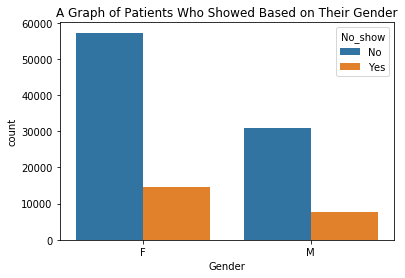

In [11]:
label('Gender', 'No_show', df, 'A Graph of Patients Who Showed Based on Their Gender')

>Deductions from the graph above


>Most patients who showed up to thier scheduled appointments are females

### Research Question 2. Is receiving SMS a factor for patients to show up?

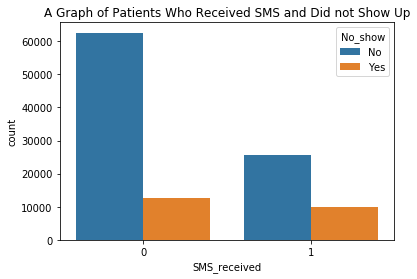

In [13]:
#Plotting a graph of patients who received SMS and showed up
label('SMS_received','No_show', df, 'A Graph of Patients Who Received SMS and Did not Show Up')

>Deductions from the graph above

>A lot of patients who received SMS did not show up for their scheduled appointments

### Research Question 3. Did scholarship beneficiaries show up?

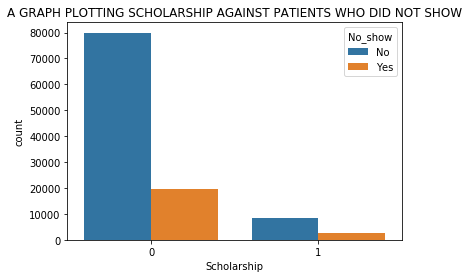

In [15]:
#Plotting a graph of patients who received scholarship and showed up
label('Scholarship', 'No_show', df, 'A GRAPH PLOTTING SCHOLARSHIP AGAINST PATIENTS WHO DID NOT SHOW')

>Deductions from the graph above

>Most beneficiaries of the Brazil scholarship did not show up

### Research Question 4. Did a lot of alcoholics show up for their scheduled interviews?

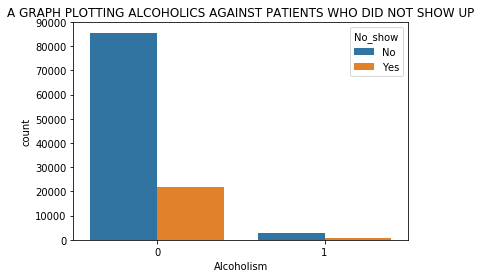

In [16]:
#Plotting a graph to show if alcoholics showed up
label('Alcoholism', 'No_show', df, 'A GRAPH PLOTTING ALCOHOLICS AGAINST PATIENTS WHO DID NOT SHOW UP')


>Deductions from the graph above

>Most alcoholics did not attend thier appointments

### Research Question 5. Is age a factor for patients to show up?

In [18]:
#Assigning variables
#In order to know the age range of patients who showed up, we need to define it

showed_up = df.query('No_show == "No"')

In [19]:
#Patients who showed up
showed_up.head(3)

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,No
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,No
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,No


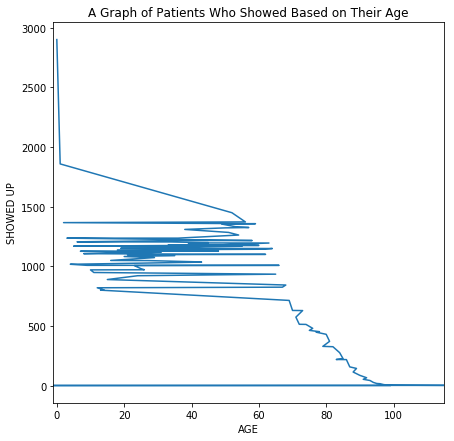

In [22]:
#Plotting a graph to show the age range of patients who showed up
showed_up['Age'].value_counts().plot(kind='line', figsize=(7,7));

plt.xlabel('AGE')
plt.ylabel('SHOWED UP')
plt.title('A Graph of Patients Who Showed Based on Their Age');

>Deductions from the graph above

>Patients who showed up were within the age range of 0 to 70

<a id='conclusions'></a>
## Conclusions

From analyzing the No Show Appointment Dataset, the following conclusions can be drawn.

1. It is likely for a female who received no SMS and scholarship to show up to her scheduled appointment
2. Some males who did not show up received scholarship
3. A lot of patients who are youth showed up for their scheduled appointment
4. A lot of patients did not show up to their appointment scheduled in the hospital located in Jardim Camburi as compared to the appointments scheduled in the hospital loacted in Aeroporto

### Limitations
We have used No Show Appointment Dataset for our analysis and worked with gender, SMS received, scholarship, alcoholism and age. Our analysis is limited to only the provided dataset. For example, it does not take all other health conditions into consideration

Dropping some variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed

In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0